c:\Users\daksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 630ms/step - loss: 6696.2446 - mean_squared_error: 6696.2446 - val_loss: 6223.4639 - val_mean_squared_error: 6223.4639
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 6697.7529 - mean_squared_error: 6697.7529 - val_loss: 6192.6909 - val_mean_squared_error: 6192.6909
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 6680.8076 - mean_squared_error: 6680.8076 - val_loss: 6162.9209 - val_mean_squared_error: 6162.9209
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 6638.8730 - mean_squared_error: 6638.8730 - val_loss: 6135.1787 - val_mean_squared_error: 6135.1787
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 6582.5317 - mean_squared_error: 6582.5317 - val_loss: 6108.1006 - val_mean_squared_error: 6108.1006
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 6587.4106 - mean_squared_error: 6587.4106 - val_loss: 6082.0562 - val_mean_squared_error: 6082.0562
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss

Mean Squared Error (MSE): 3162.85
R-Squared (R2) Score: -19766.83
Model saved as 'f1_driver_performance_model.h5'


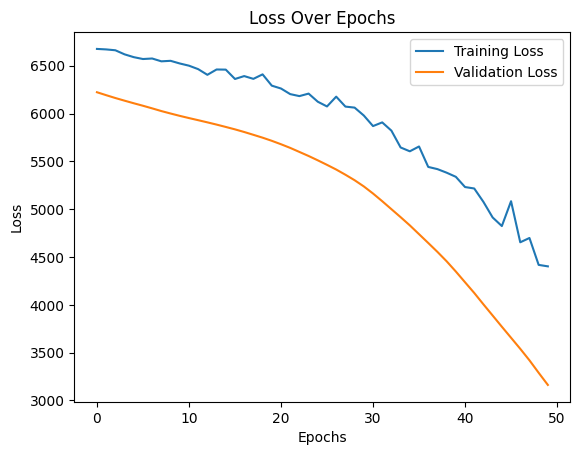

In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset
# You can replace this with any real-world dataset or use simulated data
# Example dataset: Simulated F1 performance dataset
data = {
    'Driver': ['Hamilton', 'Verstappen', 'Leclerc', 'Norris', 'Russell', 'Perez', 'Sainz'],
    'Qualifying Position': [1, 2, 3, 5, 4, 6, 7],
    'Car Performance Score': [95, 90, 88, 85, 87, 84, 82],  # Out of 100
    'Weather Condition': [1, 0, 0, 1, 0, 1, 1],  # 1 = Dry, 0 = Wet
    'Track Difficulty': [8, 7, 6, 5, 6, 5, 4],  # Scale of 1-10
    'Lap Time': [78.5, 79.3, 80.1, 81.2, 80.8, 82.4, 83.1]  # Predicted Variable (seconds)
}

df = pd.DataFrame(data)

# Step 3: Preprocessing
# Convert categorical columns like "Driver" into one-hot encoding (if needed)
df = pd.get_dummies(df, columns=['Driver'], drop_first=True)

# Separate features and target
X = df.drop(columns=['Lap Time'])
y = df['Lap Time']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Build the Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Single output for regression
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Step 5: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=4, verbose=1)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R2) Score: {r2:.2f}")

# Step 7: Save the Model
model.save("f1_driver_performance_model.h5")
print("Model saved as 'f1_driver_performance_model.h5'")

# Step 8: Visualize Results
import matplotlib.pyplot as plt

# Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50


c:\Users\daksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 503ms/step - loss: 6590.0942 - mean_squared_error: 6590.0942 - val_loss: 6139.3848 - val_mean_squared_error: 6139.3848
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 6618.6304 - mean_squared_error: 6618.6304 - val_loss: 6111.6104 - val_mean_squared_error: 6111.6104
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 6622.4302 - mean_squared_error: 6622.4302 - val_loss: 6083.7368 - val_mean_squared_error: 6083.7368
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 6546.2036 - mean_squared_error: 6546.2036 - val_loss: 6055.7891 - val_mean_squared_error: 6055.7891
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 6574.9268 - mean_squared_error: 6574.9268 - val_loss: 6028.1533 - val_mean_squared_error: 6028.1533
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 6518.5923 - mean_squared_error: 6518.5923 - val_loss: 5998.6934 - val_mean_squared_error: 5998.6934
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 6451.8052

Mean Squared Error (MSE): 2287.63
R-Squared (R2) Score: -14296.70
Model saved as 'f1_driver_performance_model.h5'


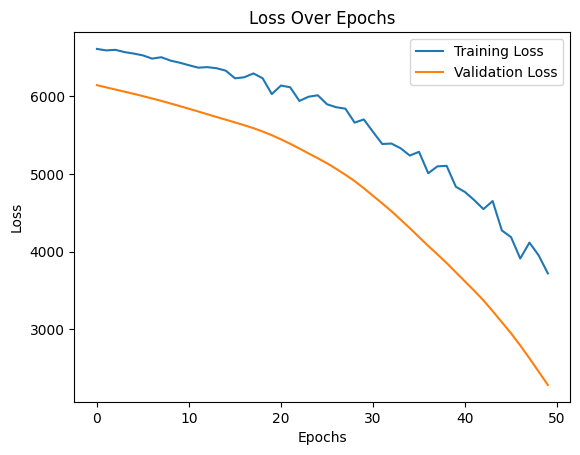

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted Lap Time: 33.64 seconds


In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Simulated Dataset
data = {
    'Driver': ['Hamilton', 'Verstappen', 'Leclerc', 'Norris', 'Russell', 'Perez', 'Sainz'],
    'Qualifying Position': [1, 2, 3, 5, 4, 6, 7],
    'Car Performance Score': [95, 90, 88, 85, 87, 84, 82],
    'Weather Condition': [1, 0, 0, 1, 0, 1, 1],  # 1 = Dry, 0 = Wet
    'Track Difficulty': [8, 7, 6, 5, 6, 5, 4],
    'Lap Time': [78.5, 79.3, 80.1, 81.2, 80.8, 82.4, 83.1]
}
df = pd.DataFrame(data)

# Step 2: Preprocessing
df = pd.get_dummies(df, columns=['Driver'], drop_first=True)
X = df.drop(columns=['Lap Time'])
y = df['Lap Time']

# Split and Scale Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build the Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Regression output
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Step 4: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=4, verbose=1)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R2) Score: {r2:.2f}")

# Step 6: Save the Model
model.save("f1_driver_performance_model.h5")
print("Model saved as 'f1_driver_performance_model.h5'")

# Step 7: Visualize Training Results
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 8: Predict New Data
new_data = {
    'Qualifying Position': [1],
    'Car Performance Score': [98],
    'Weather Condition': [1],
    'Track Difficulty': [7],
    'Driver_Hamilton': [1], 'Driver_Leclerc': [0], 'Driver_Norris': [0],
    'Driver_Perez': [0], 'Driver_Russell': [0], 'Driver_Sainz': [0],
    'Driver_Verstappen': [0]  # One-hot encode the driver manually
}

new_data = pd.DataFrame(new_data)

# Ensure columns match those in X_train
missing_columns = set(X.columns) - set(new_data.columns)
for col in missing_columns:
    new_data[col] = 0  # Add missing columns with default values (e.g., 0)

# Align column order
new_data = new_data[X.columns]

# Scale the data
new_data_scaled = scaler.transform(new_data)

# Predict Lap Time
predicted_lap_time = model.predict(new_data_scaled)
print(f"Predicted Lap Time: {predicted_lap_time[0][0]:.2f} seconds")


*Predicting on user input*

Matplotlib created a temporary cache directory at C:\Users\daksh\AppData\Local\Temp\matplotlib-n14v6np8 because the default path (C:\Users\daksh\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Epoch 1/50


c:\Users\daksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - loss: 6582.8647 - mean_squared_error: 6582.8647 - val_loss: 6151.4092 - val_mean_squared_error: 6151.4092
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 6591.8657 - mean_squared_error: 6591.8657 - val_loss: 6114.8027 - val_mean_squared_error: 6114.8027
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 6569.4917 - mean_squared_error: 6569.4917 - val_loss: 6076.5659 - val_mean_squared_error: 6076.5659
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 6542.5986 - mean_squared_error: 6542.5986 - val_loss: 6039.9443 - val_mean_squared_error: 6039.9443
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 6487.0469 - mean_squared_error: 6487.0469 - val_loss: 6005.8896 - val_mean_squared_error: 6005.8896
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 6483.1997 - mean_squared_error: 6483.1997 - val_loss: 5973.0190 - val_mean_squared_error: 5973.0190
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 6460.1265 -

Mean Squared Error (MSE): 1777.49
R-Squared (R2) Score: -11108.30
Model saved as 'f1_driver_performance_model.h5'


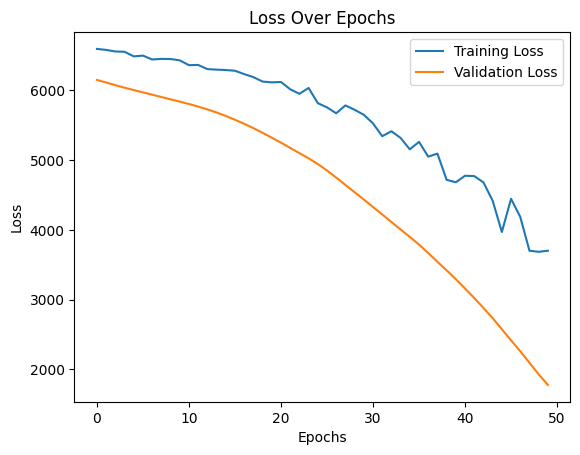


Select the driver (1-7):
1. Hamilton
2. Verstappen
3. Leclerc
4. Norris
5. Russell
6. Perez
7. Sainz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step

Predicted Lap Time for the selected driver: 41.81 seconds


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout #prevents overfitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Simulated Dataset
data = {
    'Driver': ['Hamilton', 'Verstappen', 'Leclerc', 'Norris', 'Russell', 'Perez', 'Sainz'],
    'Qualifying Position': [1, 2, 3, 5, 4, 6, 7],
    'Car Performance Score': [95, 90, 88, 85, 87, 84, 82],
    'Weather Condition': [1, 0, 0, 1, 0, 1, 1],  # 1 = Dry, 0 = Wet
    'Track Difficulty': [8, 7, 6, 5, 6, 5, 4],
    'Lap Time': [78.5, 79.3, 80.1, 81.2, 80.8, 82.4, 83.1]
}
df = pd.DataFrame(data)

# Step 2: Preprocessing
df = pd.get_dummies(df, columns=['Driver'], drop_first=True)
X = df.drop(columns=['Lap Time'])
y = df['Lap Time']

# Split and Scale Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build the Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Regression output
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Step 4: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=4, verbose=1)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R2) Score: {r2:.2f}")

# Step 6: Save the Model
model.save("f1_driver_performance_model.h5")
print("Model saved as 'f1_driver_performance_model.h5'")

# Step 7: Visualize Training Results
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 8: Collect User Input for Prediction

# Define the possible drivers
drivers = ['Hamilton', 'Verstappen', 'Leclerc', 'Norris', 'Russell', 'Perez', 'Sainz']

# Get user input for each feature
qualifying_position = int(input("Enter the Qualifying Position (1-7): "))
car_performance_score = int(input("Enter the Car Performance Score (80-100): "))
weather_condition = int(input("Enter the Weather Condition (1 for Dry, 0 for Wet): "))
track_difficulty = int(input("Enter the Track Difficulty (1-10): "))

# Get user input for selecting a driver with validation
def get_driver_input():
    while True:
        try:
            print("\nSelect the driver (1-7):")
            for i, driver in enumerate(drivers, 1):
                print(f"{i}. {driver}")
            user_input = input("Enter the number of the driver: ")
            # Ensure input is not empty and convert it to integer
            if not user_input.strip():  # Check if the input is empty
                print("Error: Input cannot be empty. Please select a valid driver.")
                continue
            driver_index = int(user_input) - 1  # Get the index based on user input

            # Check if the input is valid (1-7)
            if driver_index < 0 or driver_index >= len(drivers):
                print("Error: Please select a number between 1 and 7.")
            else:
                return driver_index
        except ValueError:
            print("Error: Please enter a valid number between 1 and 7.")

# Now call the function to get the driver input
driver_index = get_driver_input()

# Create the one-hot encoded driver data
driver_one_hot = [0] * 7
driver_one_hot[driver_index] = 1
# Prepare the new data for prediction
new_data = {
    'Qualifying Position': [qualifying_position],
    'Car Performance Score': [car_performance_score],
    'Weather Condition': [weather_condition],
    'Track Difficulty': [track_difficulty],
    'Driver_Hamilton': [driver_one_hot[0]], 
    'Driver_Leclerc': [driver_one_hot[1]], 
    'Driver_Norris': [driver_one_hot[2]],
    'Driver_Perez': [driver_one_hot[3]], 
    'Driver_Russell': [driver_one_hot[4]], 
    'Driver_Sainz': [driver_one_hot[5]],
    'Driver_Verstappen': [driver_one_hot[6]]
}

new_data = pd.DataFrame(new_data)

# Ensure columns match those in X_train
missing_columns = set(X.columns) - set(new_data.columns)
for col in missing_columns:
    new_data[col] = 0  # Add missing columns with default values (e.g., 0)

# Align column order
new_data = new_data[X.columns]

# Scale the data
new_data_scaled = scaler.transform(new_data)

# Predict Lap Time
predicted_lap_time = model.predict(new_data_scaled)
print(f"\nPredicted Lap Time for the selected driver: {predicted_lap_time[0][0]:.2f} seconds")
